In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

In [46]:
df = pd.read_csv('rmsd_distributions.csv')

In [47]:
df

,correct_mutant_no_relax,final_relax,first_relax,md_frame_WT,minim_gromacs,noisy_0.05,noisy_0.1,index_choice
0,0.201842,0.971319,0.924940,1.175781,0.421400,0.214039,0.245430,20020
1,0.238718,1.050899,0.953047,1.476265,0.438727,0.250717,0.277429,26865
2,0.212575,0.722204,0.662359,0.935600,0.417166,0.224572,0.256864,14358
3,0.113216,0.893290,0.839329,1.383970,0.270825,0.133366,0.183444,32266
4,0.215007,0.835274,0.796265,1.076544,0.406877,0.226241,0.259240,14890
...,...,...,...,...,...,...,...,...
2995,0.172553,0.948587,0.772051,1.407316,0.315855,0.186943,0.223628,32223
2996,0.226674,0.870497,0.790605,1.178700,0.417151,0.237622,0.268876,11607
2997,0.239112,0.734643,0.691334,1.192720,0.415890,0.248740,0.277193,9591
2998,0.192944,0.746682,0.685688,1.554226,0.395537,0.205387,0.237684,10444


In [48]:
df.drop(columns=['index_choice'], inplace=True)
# change name
df.rename(columns={'correct_mutant_no_relax': 'mutant_no_relax'}, inplace=True)

In [49]:
# Reorganise the dataframe
df_for_display = df.melt(var_name='Method', value_name='RMSD')

Text(0.5, 1.0, 'RMSD distributions for different methods')

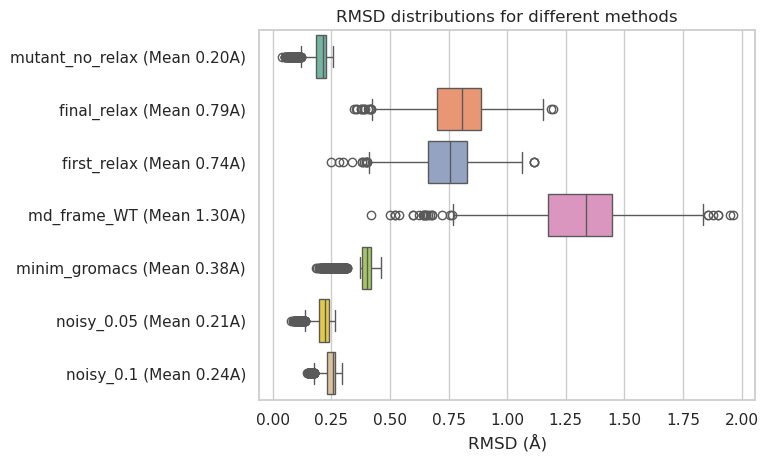

In [53]:
sns.boxplot(x='RMSD', y='Method', data=df_for_display, orient='h', palette='Set2', hue='Method', vert=False)
# Add rmsd mean
means = df.mean()
# for i in range(len(means)):
#     plt.scatter(means[i], i, color='black', s=100, marker='x')
plt.yticks(range(len(means)), [f'{i} (Mean {means[i]:.2f}A)' for i in means.index])
plt.xlabel('RMSD (Å)')
plt.ylabel('')
plt.title('RMSD distributions for different methods')